## Numerical integration of coupled first-order ODEs

#### Damped harmonic oscillator
The equation of motion for a damped harmonic oscillator is ta
$$ \frac{d^2x}{dt^2} = -\omega_0^2 x - \gamma \frac{dx}{dt}. $$
Working with dimensionless variables in which time is measured in 
units of $\omega_0^{-1}$ this equation of motion can be rewritten as 
$$ \frac{d^2x}{dt^2} = -x - b\frac{dx}{dt},  $$
where $b = \gamma/\omega_0$.

This second order differential equation can be written as two coupled first-order equations:

\begin{eqnarray*}
\frac{dx}{dt} &=& v\\
\frac{dv}{dt} &=& -x - bv
\end{eqnarray*}

The function below returns the RHS of these differential equations; the lines above the `return` relates the elements of the array `u[i]` with variables that have more physical meaning.

In [1]:
import scipy as sp
from scipy import integrate   # not included in basic scipy

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [2]:
# Function returning derivatives of the dependent quantities u[0] 
# and  u[1], or more physically, x and v.
def damped_osc(u,t,b):
    x = u[0]
    v = u[1]
    return (v,-x-b*v)

#### Initial conditions, and parameter(s)

In [3]:
x0 = 2
v0 = 0
b = 0.4  # Damping parameter
u0 = sp.array([x0,v0])

In following cell:
- Choose points for output.<br>
- Integrate.<br>
<b>Note:</b> `odeint` returns an array:<br>
  `[[x_0  v_0],`<br>
  `[x_1  v_1],`<br>
  `[x_2  v_2], ...]`<br>
  To get single list for `x` and single list for `v` we need the transpose of the returned array.<br>
  (Could also keep return as a single array if that's more useful down the road.)

In [4]:
t = sp.linspace(0,20,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(damped_osc,u0,t,args=(b,)).T

Text(0,0.5,'$x(t)$ and $v(t)$')

C:\Users\oldyu\Miniconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


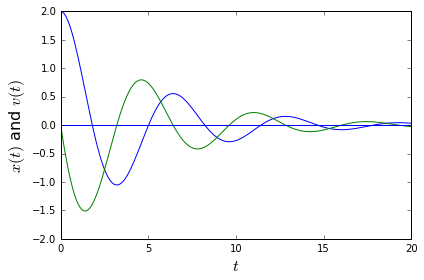

In [5]:
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

C:\Users\oldyu\Miniconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


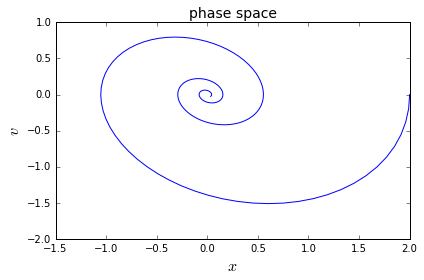

In [6]:
plt.figure(2)
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.title("phase space",fontsize=14)
plt.plot(x,v);

### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on linuxremotes), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [7]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [8]:
version_information scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
Tue Aug 01 11:20:53 2017 EDT